# Postprocessing VTK/VTU Files

The Visualization Toolkit (VTK) is a popular open source software for manipulating and displaying scientific data.
FEMAG model file (ISA7/I7, NC) can be converted into a VTU file which is VTK file format for unstructured grids.

In [1]:
import femagtools.convert
import femagtools.nc

model = 'PM270L8'
nc = femagtools.nc.read(model)
femagtools.convert.to_vtu(nc, model+'.vtu')

In addition VTU files can be created when running a simulation using the parameter m.movie_type = 'vtu'.

The VTU files contain the mesh together with the simulation results a such as the vector potential, flux densities etc.

This notebook gives an overview of postprocessing these files with Python using the modules vtk and pyvista.

In [2]:
import vtk

In [3]:
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName(model+'.vtu')
reader.Update()
output = reader.GetOutput()

Print names of cell data arrays:

In [4]:
[output.GetCellData().GetAbstractArray(i).GetName()
            for i in range(output.GetCellData().GetNumberOfArrays())]

['GeometryIds',
 'PhysicalIds',
 'b',
 'Demagnetization',
 'Rel. Permeability',
 'Iron Loss Dens.',
 'Mag. Loss Dens.',
 'Wdg. Loss Dens.']

Get values of demagnetization

In [5]:
from vtk.util.numpy_support import vtk_to_numpy
demag = vtk_to_numpy(output.GetCellData().GetArray('Demagnetization'))

Show a histogram

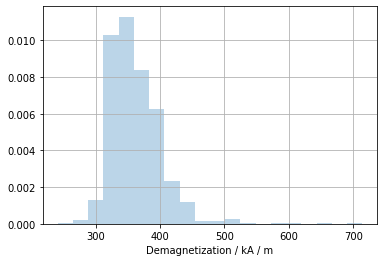

In [6]:
import matplotlib.pyplot as plt
plt.hist(demag[demag!=0.0], bins=20, density=True, alpha=0.3)
plt.xlabel('Demagnetization / kA / m')
plt.grid()

# Using pyvista

The pyvista module provides a simplified access:

In [7]:
import pyvista as pv

In [8]:
mesh = pv.read(model+'.vtu')

In [9]:
mesh

UnstructuredGrid (0x7fcef19c5a80)
  N Cells:	11360
  N Points:	7128
  X Bounds:	3.253e-02, 1.375e-01
  Y Bounds:	-1.639e-08, 9.723e-02
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	9

/home/tar/.virtualenvs/femagtools/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


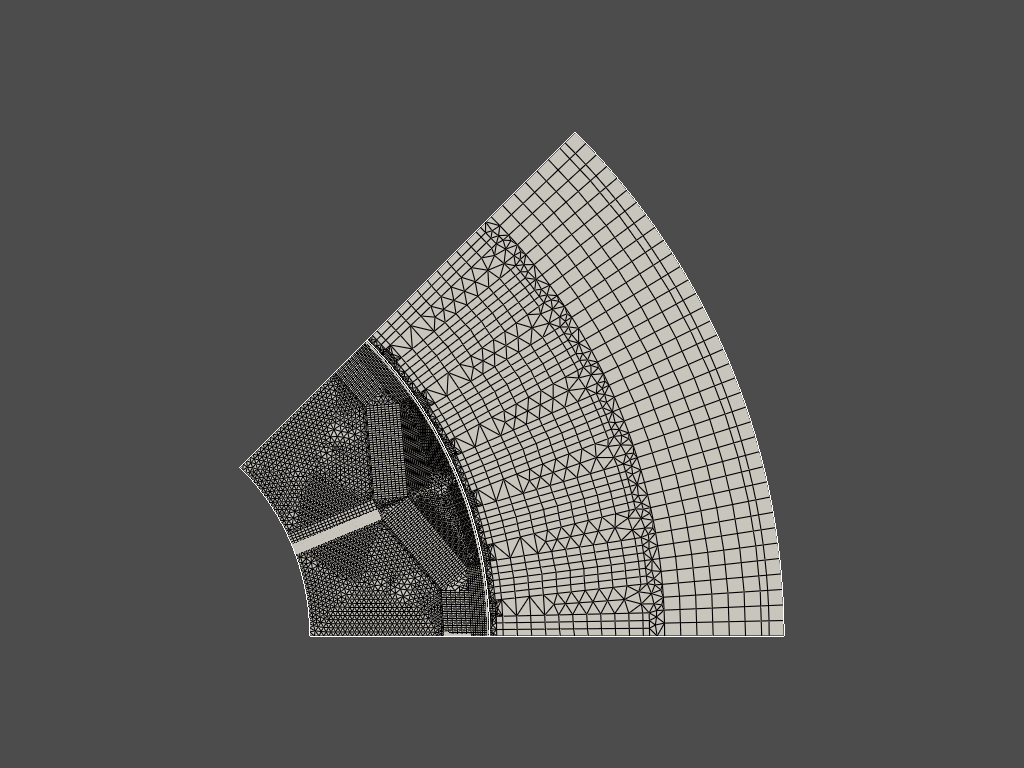

In [10]:
mesh.plot(show_scalar_bar=False, show_axes=False, show_edges=True, cpos='xy')

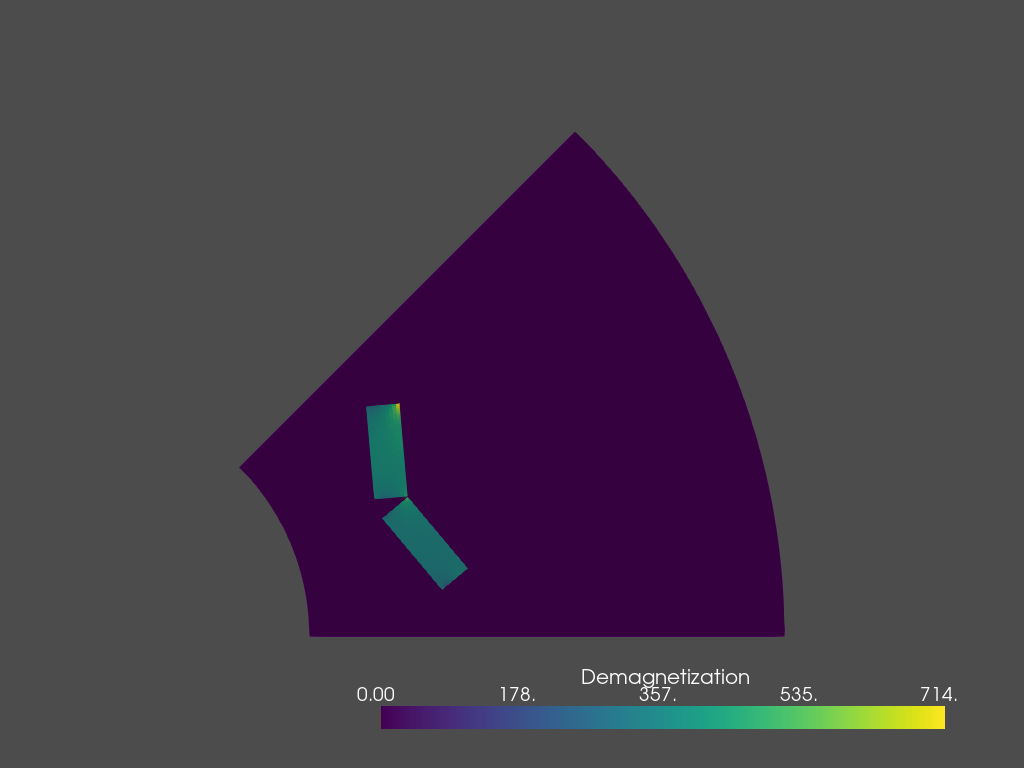

In [11]:
plotter = pv.Plotter(notebook=True)
plotter.enable_anti_aliasing()
plotter.add_mesh(mesh,scalars='Demagnetization')
plotter.view_xy()
plotter.show()

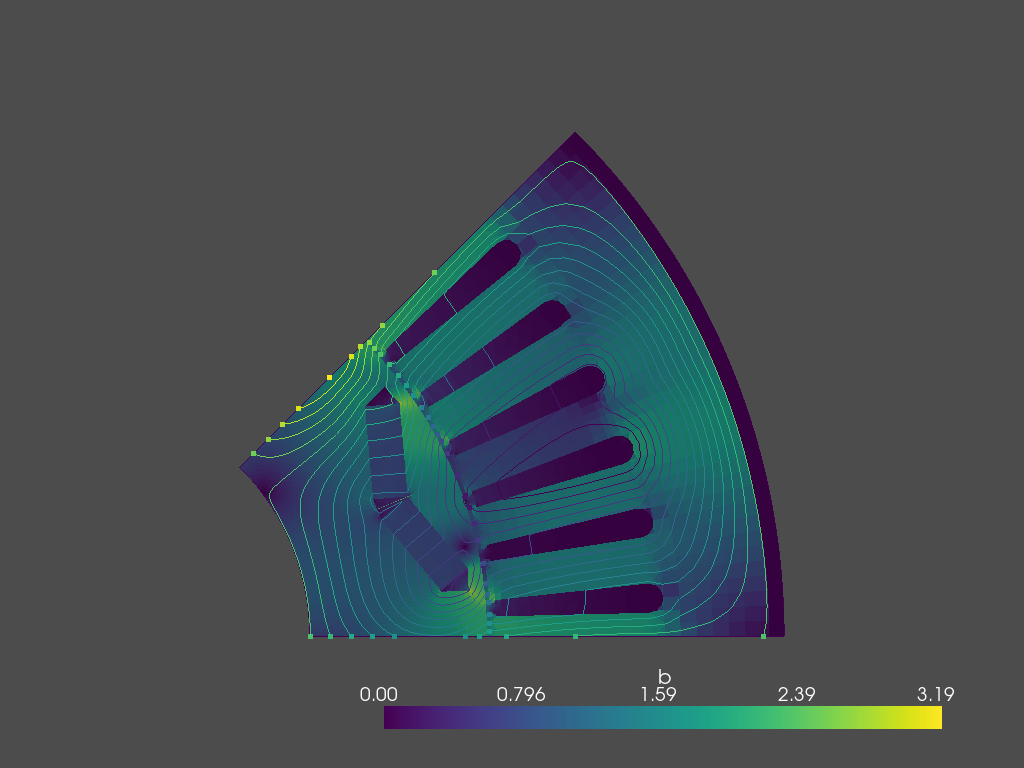

In [12]:
plotter = pv.Plotter(notebook=True)
mesh = pv.read(model+'.vtu')
contours = mesh.contour(isosurfaces=20, scalars='potential')
actor = plotter.add_mesh(mesh,scalars='b')
actor = plotter.add_mesh(contours, show_scalar_bar=False)
plotter.view_xy()
plotter.show()